# Extract the job skills  from each job post

In [ ]:
import zipfile
from bs4 import BeautifulSoup
import re

# Open the zipped file and extract its contents
with zipfile.ZipFile("/content/sample_data/job_postings.zip", "r") as zip_file:
    # create a list to hold all the extracted content
    extracted_content = []

    # go through all html files 
    for filename in zip_file.namelist():
        if filename.endswith(".html"):
            # extract the listed content from each file and append it to extracted_content list
            with zip_file.open(filename) as f:
                html_bytes = f.read()
                soup = BeautifulSoup(html_bytes, "html.parser") #"html.parser"
                #print(soup)
                uls = soup.find_all('ul') #find unordered lists
                content = '' # create a empty string to join all listed content
                for ul in uls:
                    lis = ul.find_all('li') #list items within an ordered or unordered list
                    for li in lis:
                        text = li.get_text()
                        text = re.sub(r'[^\w\s]', '', text) #Remove punctuation 
                        text=text.lower() 
                        content += text[2:].strip() + ' '
                extracted_content.append(content)


In [ ]:
len(extracted_content)

1458

In [ ]:
extracted_content[1]

'e statistical research methods to analyze datasets produced through multiple sources of intelligence production ne and analyze data from databases to answer key intelligence questions sess the effectiveness and accuracy of new data sources and data gathering techniques velop custom data models and algorithms to apply to data sets e predictive modeling to produce reporting about future trends based on historical data atially analyze geographic data using gis tools sualize findings in easily understood graphics and aesthetically appealing finished reports perience using statistical computer languages r python slq etc to manipulate data and draw insights from large data sets perience in basic visualization methods especially using tools such as tableau ggplot and matplotlib owledge of a variety of machine learning techniques clustering decision tree learning artificial neural networks etc and their realworld advantagesdrawbacks owledge of advanced statistical techniques and concepts regr

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# use TfidfVectorizer to transform the job postings 
vectorizer = TfidfVectorizer(stop_words='english')
job_postings_tfidf = vectorizer.fit_transform(extracted_content)
job_postings_tfidf

<1458x14945 sparse matrix of type '<class 'numpy.float64'>'
	with 157151 stored elements in Compressed Sparse Row format>

# find the best number of clusters using elbow method

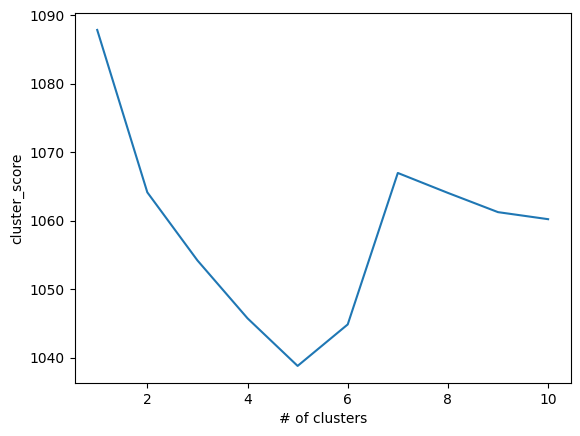

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# try a range of n_clusters number and plot for elbow method. 
cluster_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(job_postings_tfidf)
    cluster_score.append(kmeans.inertia_)

plt.plot(range(1, 11), cluster_score)
plt.xlabel('# of clusters')
plt.ylabel('cluster_score')
plt.show()


In [ ]:
#Choose n_clusters=5 and clsuter the skills 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10)
kmeans.fit(job_postings_tfidf)

KMeans(n_clusters=5, n_init=10)

## Disply WordCloud for each cluster

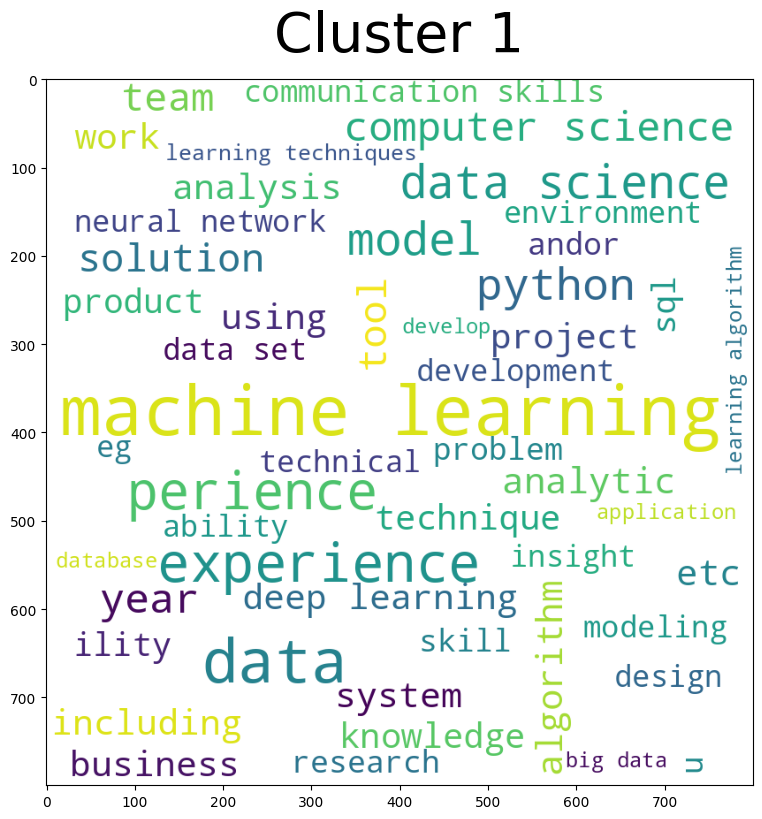

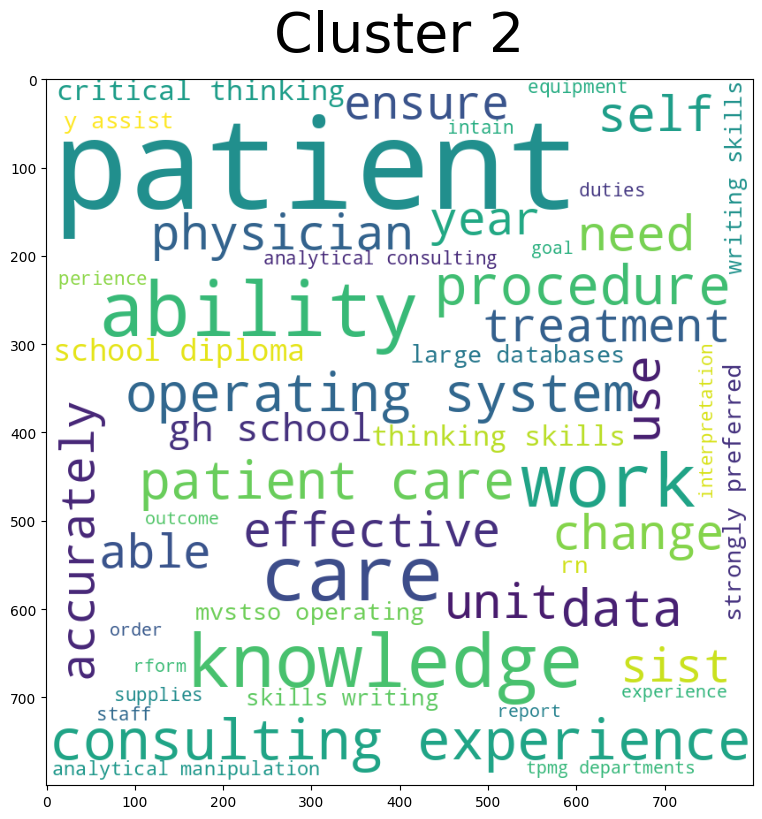

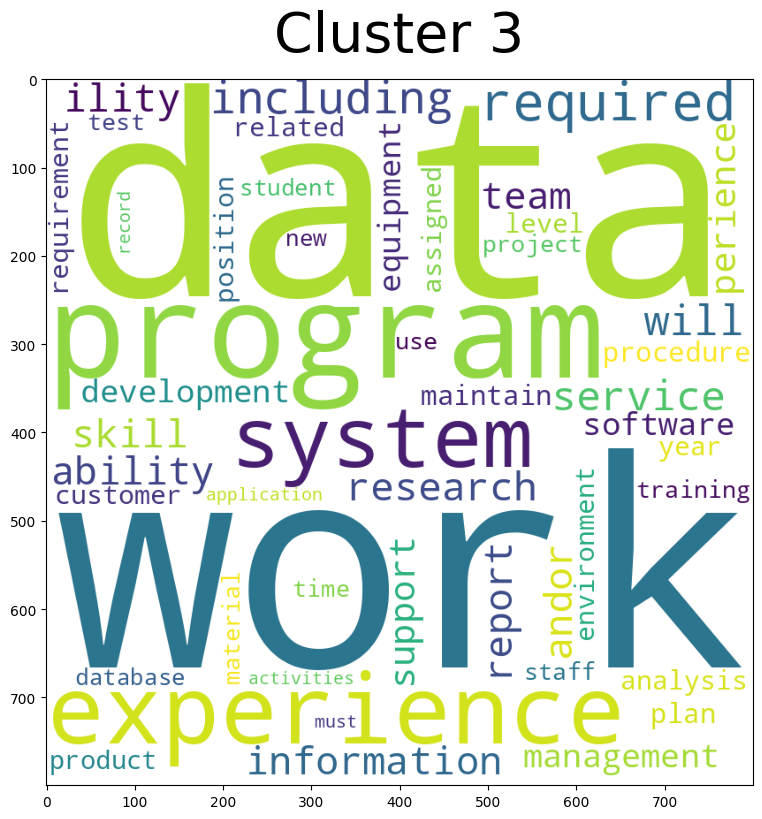

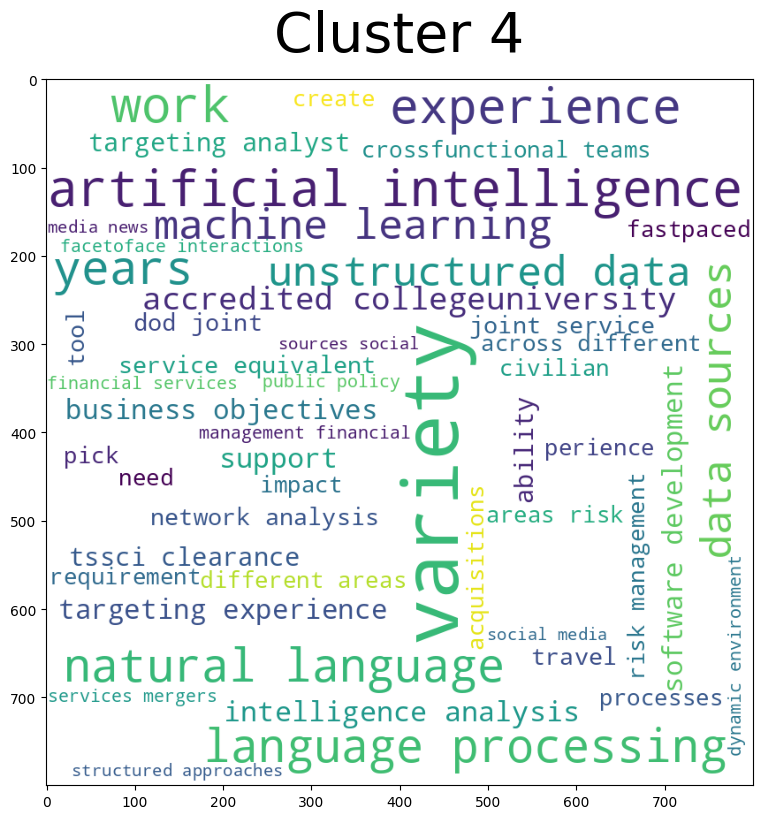

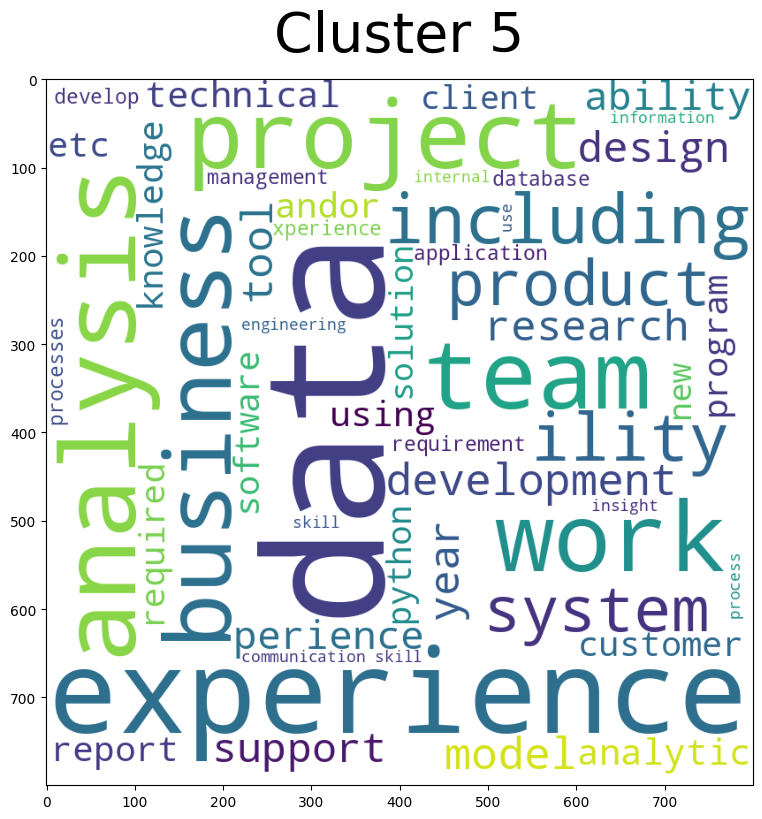

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a WordCloud fro each cluster and plot
for i in range(5):
    cluster_text = []
    for j in range(len(extracted_content)):
        if kmeans.labels_[j] == i:
            cluster_text.append(extracted_content[j])
    cluster_text = " ".join(cluster_text)
    wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50, contour_width=3, contour_color='steelblue').generate(cluster_text)
    plt.figure(figsize=(8, 8))
    plt.imshow(wordcloud)
    plt.title(f"Cluster {i+1}", fontsize=40, pad=20)
    plt.tight_layout(pad=0)
    plt.show()


# Extract the resume skills 

In [ ]:
import re

with open('/content/sample_data/resume.txt', 'r') as file:
    content = file.read()

resume_skills = re.findall('\d+\.\s(.+)', content) #xtract numbered items
resume_skills = [re.sub(r'[^\w\s]', '', text) for text in resume_skills]  #Remove punctuation 
resume_skills=[text.lower() for text in resume_skills]
resume_skills_string=' '.join(resume_skills)

print(resume_skills_string)

developed probability simulations using numpy assessed online adclicks for statistical significance using permutation testing analyzed disease outbreaks using common clustering algorithms data visualization using matplotlib statistical analysis using scipy processing structured tables using pandas executing kmeans clustering and dbscan clustering using scikitlearn extracting locations from text using geonamescache location analysis and visualization using geonamescache and basemap dimensionality reduction with pca and svd using scikitlearn nlp analysis and text topic detection using scikitlearn


# Find the best match between the resume and the job posts using cosine similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# vectorize the resume skills string
vectorizer = TfidfVectorizer(stop_words='english')
vectorized_resume_skills = vectorizer.fit_transform([resume_skills_string])

# vectorize the extracted content list
vectorized_extracted_content = vectorizer.transform(extracted_content)

# calculate cosine similarity between resume skills and job posts 
cosine_similarities = []
for i in range(len(extracted_content)):
    similarity = cosine_similarity(vectorized_resume_skills, vectorized_extracted_content[i])
    cosine_similarities.append(similarity)

# find best match
best_match_index = cosine_similarities.index(max(cosine_similarities))
print("best index: ", best_match_index)
best_match_content = extracted_content[best_match_index]

print(best_match_content)
print(resume_skills_string)

best index:  1321
perience with digital map production preferably using the arcgis platform tabase design and management using sql or equivalent technology atistical analysis using r stata spss or related technologies me experience with html  css is preferred but not necessary ility to create training materials and to host training events ility to write for both general public and specialist audiences ility to travel including to disaster areas tail oriented with the ability to take initiative and work independently 
developed probability simulations using numpy assessed online adclicks for statistical significance using permutation testing analyzed disease outbreaks using common clustering algorithms data visualization using matplotlib statistical analysis using scipy processing structured tables using pandas executing kmeans clustering and dbscan clustering using scikitlearn extracting locations from text using geonamescache location analysis and visualization using geonamescache and

# New Section